In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from utils.constants import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import utils.ism_functions as ismf

print('mean density', ismf.meandensity(1e5*Msun, 20*pc, shape='sphere'), 'cm-3')
print('free fall time', ismf.freefalltime(100.), 'Myr')
print('sound speed', ismf.csound(1e4), 'km/s')
print('Jeans length', ismf.jeanslength(100., 1e3), 'pc')
print('Jeans mass', ismf.jeansmass(100., 1e3), 'Msun')
print('sigma', ismf.sigmaturb(1e5*Msun, 20*pc, 1.), 'cm/s')



('mean density', 8.166870827611523e-21, 'cm-3')
('free fall time', 5.149880209031085, 'Myr')
('sound speed', 9.085370369004915, 'km/s')
('Jeans length', 27.864095888809974, 'pc')
('Jeans mass', 28003.685830059105, 'Msun')
('sigma', 359184.39017199434, 'cm/s')


In [4]:
import star_utils.stellar_properties as sprop

print('Lstar', sprop.luminosity_star(10.), 'Lsun')
print('Mstar', sprop.mass_star(1e3), 'Msun')
print('Rstar', sprop.radius_star(1e3*Lsun), 'cm')         

('Lstar', 5551.88592961293, 'Lsun')
('Mstar', 5.9863449676598135, 'Msun')
('Rstar', 246292824758.4344, 'cm')


('Rstar', 4736436.941828642, 'Km')
('Mstar', 27.905725834777883, 'Msun')
('UV luminosity', 1.5341748279455844e+38, 'erg/s')
('specific flux at 10 pc at 13.6eV', 7.152396033296826e-18, 'erg/s/cm2/Hz')


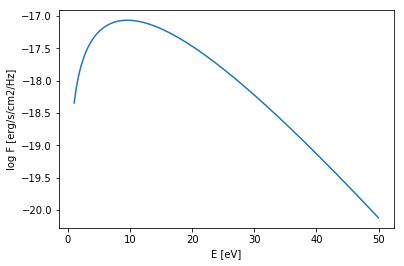

In [19]:
import star_utils.spectra as spectra

star = spectra.star(Lstar=1e5*Lsun)

print('Rstar', star.Rstar/1e5, 'Km')
print('Mstar', star.Mstar/Msun, 'Msun')
print('UV luminosity', star.L(v1=13.6*eV/h, v2=1000.*eV/h), 'erg/s')

star.set_distance(10.*pc)
print('specific flux at 10 pc at 13.6eV', star.Fv_cm2s(13.6*eV/h), 'erg/s/cm2/Hz')

freq = np.linspace(1., 50., 1000) * eV/h
flux = star.Fv_cm2s(freq)

plt.plot(freq*h/eV, np.log10(flux))
plt.xlabel('E [eV]')
plt.ylabel('log F [erg/s/cm2/Hz]')
plt.show()

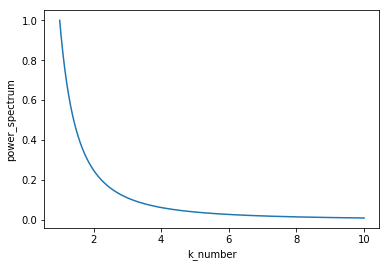

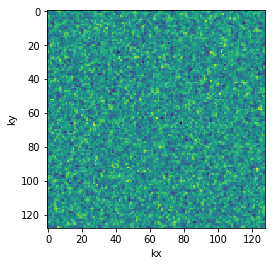

In [31]:
import utils.random_gaussian_field as rgf

power_spectrum = rgf.return_power_spectrum(-2, 1, 10)

krange = np.linspace(1., 10., 1000)
Prange = power_spectrum(krange)

plt.plot(krange, Prange)
plt.xlabel('k_number')
plt.ylabel('power_spectrum')
plt.show()

pert_map = rgf.scalar_perturbs(7, 100., power_spectrum)
plt.imshow(pert_map[:,:,16])
plt.xlabel('kx')
plt.ylabel('ky')
plt.show()